In [1]:
import matplotlib as plt
import pandas as pd
import matplotlib as plt
from datetime import datetime, timedelta
import time
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\geogh\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv("demographic.csv")

In [5]:
import datetime as dt

df["Crash_Date"] = pd.to_datetime(df["Crash_Date"], format= "%m/%d/%Y")

df["time_segment"] = np.where((df["Crash_Date"] <= dt.date(2014,6,1)),"before", 
                              np.where((df["Crash_Date"] > dt.date(2014,6,1)) & (df["Crash_Date"] <= dt.date(2016,5,10)), "entry",
                                       np.where((df["Crash_Date"] > dt.date(2016,5,10)) & (df["Crash_Date"] <= dt.date(2017,5,29)), "exit",
                                                np.where((df["Crash_Date"] > dt.date(2017,5,29)), "re-entry",
                                                         "error"))))

C:\Users\geogh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
C:\Users\geogh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
C:\Users\geogh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain th

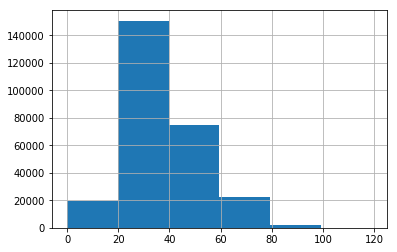

In [6]:
df["Prsn_Age"].hist(bins=6)

In [16]:
col         = 'Prsn_Age'
conditions  = [ df[col] <= 25, (df[col] <= 40) & (df[col] > 25), (df[col] <= 65) & (df[col] > 40), df[col] > 65]
choices     = [ "new", 'young', 'middle-aged', 'retired' ]

df["age_segment"] = np.select(conditions, choices, default=np.nan)

In [17]:
df["age_segment"].value_counts()

young          101448
middle-aged     81884
new             73818
nan             16389
retired         12941
Name: age_segment, dtype: int64

In [18]:
df["time_segment"].value_counts()

before      119065
re-entry     75143
entry        56980
exit         35292
Name: time_segment, dtype: int64

In [26]:
mask = df["Prsn_Gndr_ID"] == 1
df["Prsn_Gndr_ID"][mask] = "Male"

mask = df["Prsn_Gndr_ID"] == 2
df["Prsn_Gndr_ID"][mask] = "Female"
df["Prsn_Gndr_ID"].value_counts()

Male      157371
Female    114266
0.0        14154
Name: Prsn_Gndr_ID, dtype: int64

In [ ]:
df.to_csv(r'demo output.csv')